## Midterm Exam

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm                       # -> for QQ plot
from statsmodels.graphics.mosaicplot import mosaic # -> for mosaic plot

path = "../src/data/"

## Data

In [ ]:
stud_perf = pd.read_csv(path + "student/student-mat.csv", sep=";")
concrete = pd.read_csv(path + "concrete+slump+test/slump_test.data")
wip = pd.read_table(path+"wip.txt", sep=" ")


In [ ]:
import json
with open(path+"phones.json") as f:
    x = json.load(f)
x
x['corrected_calls'][1::2]

### Question 

In [ ]:
# 
plt.hist(stats.mstats.winsorize(concrete['Compressive Strength (28-day)(Mpa)'], limits=0.1))

### Question 

In [ ]:
# 
concrete

In [ ]:
concrete.rename(columns={'No':'id', 'Compressive Strength (28-day)(Mpa)':'Comp_Strength'}, inplace=True)
x = concrete.Comp_Strength.copy()
lower, upper = np.quantile(x,[0.1,0.9])
x[x < lower] = lower
x[x > upper] = upper
x.mean()
stats.mstats.winsorize(concrete.Comp_Strength, limits=0.1).mean()

(array([18.,  8.,  9., 13.,  9.,  8.,  7., 10.,  4., 17.]),
 array([27.09 , 28.963, 30.836, 32.709, 34.582, 36.455, 38.328, 40.201,
        42.074, 43.947, 45.82 ]),
 <BarContainer object of 10 artists>)

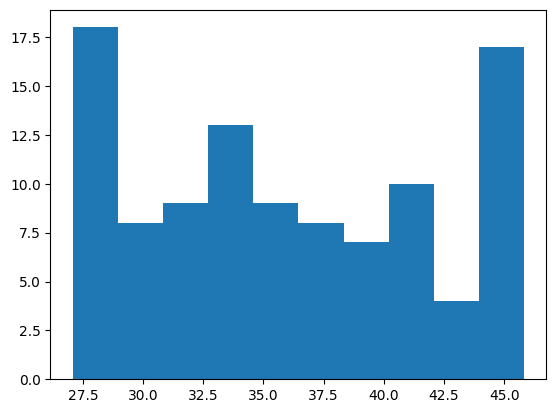

In [47]:
plt.hist(stats.mstats.winsorize(concrete.Comp_Strength, limits=0.1))

(array([ 0.,  0.,  0., 23., 28., 22., 19., 11.,  0.,  0.]),
 array([10. , 15.1, 20.2, 25.3, 30.4, 35.5, 40.6, 45.7, 50.8, 55.9, 61. ]),
 <BarContainer object of 10 artists>)

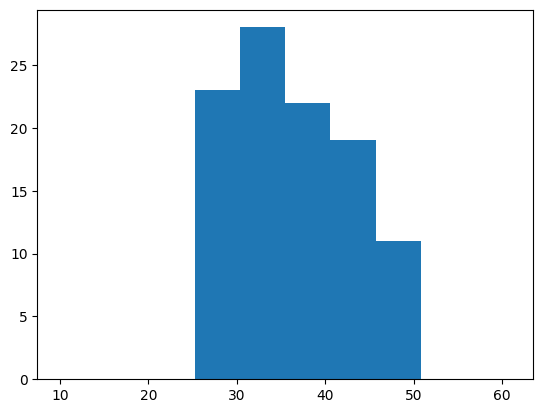

In [51]:
plt.hist(stats.mstats.winsorize(concrete.Comp_Strength, limits=0.1).data, range=(10,61))

In [52]:
?plt.hist

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    *,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

In [ ]:
re2 = pd.DataFrame({'house_age':[23], 'lat':[44]})
re2.loc['0',['house_age', 'lat']]               

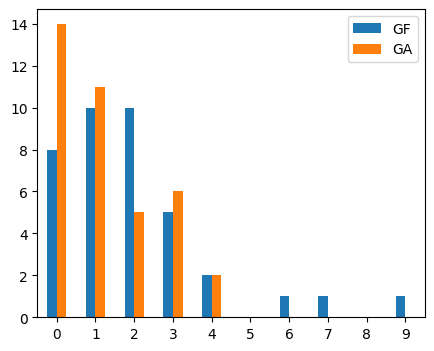

In [ ]:
liverpool = pd.read_csv("/Users/qiujinhang/Desktop/ST2137/Tutorial/tut2/liverpool_2223_season.csv") # -> dataframe
goal_counts = pd.DataFrame(np.zeros((10,2), dtype='int'), columns=['GF', 'GA'])
tmp2 = liverpool.GF.value_counts()
goal_counts.loc[tmp2.index, 'GF'] = tmp2
tmp3 = liverpool.GA.value_counts()
goal_counts.loc[tmp3.index, 'GA'] = tmp3
ax = goal_counts.plot(kind='bar', stacked=False, rot=0.5, figsize=(5,4))


In [ ]:
def possion(y, tol):
    lam_old = 0 # i think this one should come from tut2 lambda
                # but i initialize as 0 here
    lam_new = 0
    while (abs(lam_old - lam_new) >= tol):
        lam_old = lam_new
        z = y.mean() * (1 - np.exp(-lam_old))
        lam_new = z
    return lam_new